First, let's create some random data to simulate particles inside a simulation box.

If using a .gro coordinate file, the functions.py module provides a helper function that can transcribe the file into mapped particle coordinates along with their corresponding radii.

The code implements a probe insertion method to capture the void size distribution. The simulation box, containing the particles (treated as spheres), is discretized into cubes defined by the number of grid points (number_grid_points).

At the center of each cube (grid center), an initial probe sphere with a radius of 0.001 nm is inserted. The algorithm checks for overlaps between the probe sphere and the existing particles:

    If an overlap is detected, it moves to the next grid center.

    If no overlap is found, the probe sphere’s radius is increased by 0.001 nm (step_size) until it intersects with an existing sphere.

    If two inserted probe spheres overlap, the algorithm prioritizes the larger sphere to better capture the void regions.

After the insertion of probe spheres, the derivative of the distribution function is taken.

Box dimensions (nm)
[3, 3, 3]
Uniform centers (ngrid=5): 3375
Parent cell size (nm): x:0.2000, y:0.2000, z:0.2000
Grid cube volume (nm^3): 0.008000
Estimated pair checks (centers × dots): 16871625


Processing grid centers: 100%|██████████| 3375/3375 [00:06<00:00, 483.31it/s]


# maximal spheres kept: 3375
The area under the curve is:1.0
Elapsed time: 7.119697332382202 seconds
The dictionary has been saved as /raid6/homes/ordoriaf/work/VoidSizeAnalyzer/results/PSD_histogram.json
The dictionary has been saved as /raid6/homes/ordoriaf/work/VoidSizeAnalyzer/results/PSD_Cumulative.json
The dictionary has been saved as /raid6/homes/ordoriaf/work/VoidSizeAnalyzer/results/PSD_derivative.json


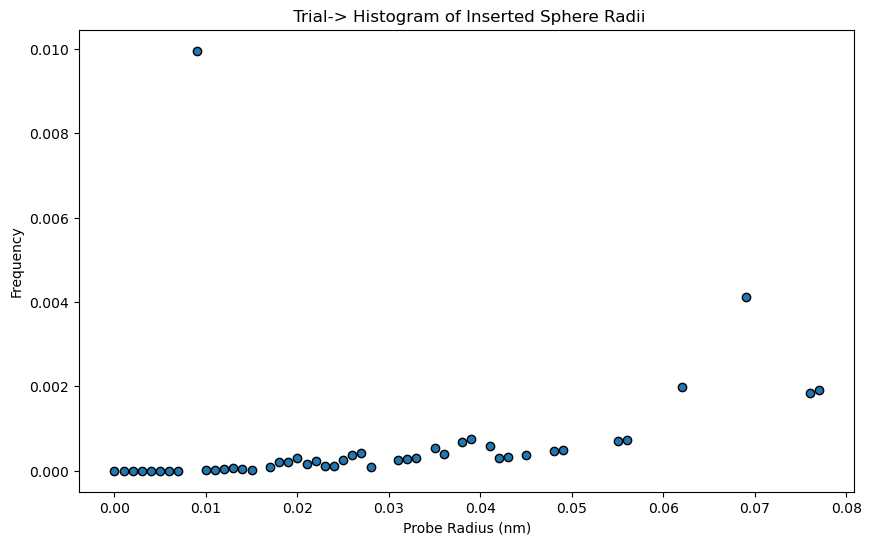

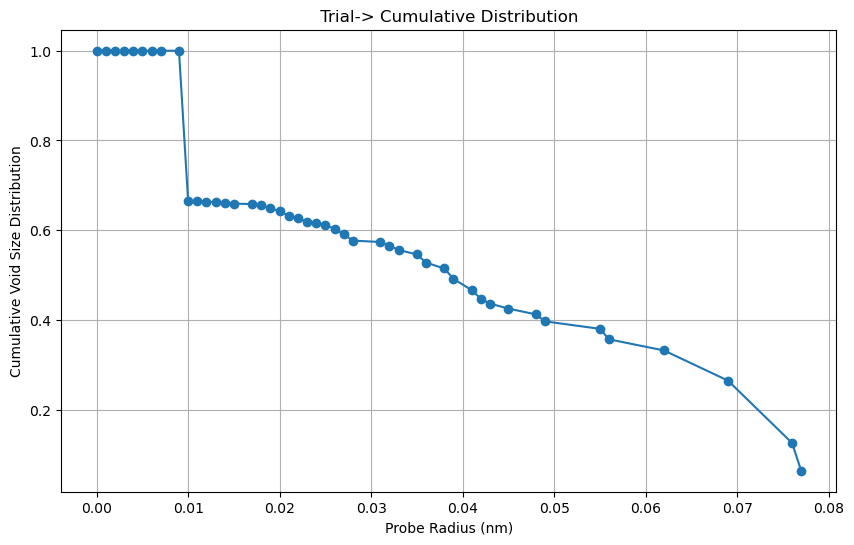

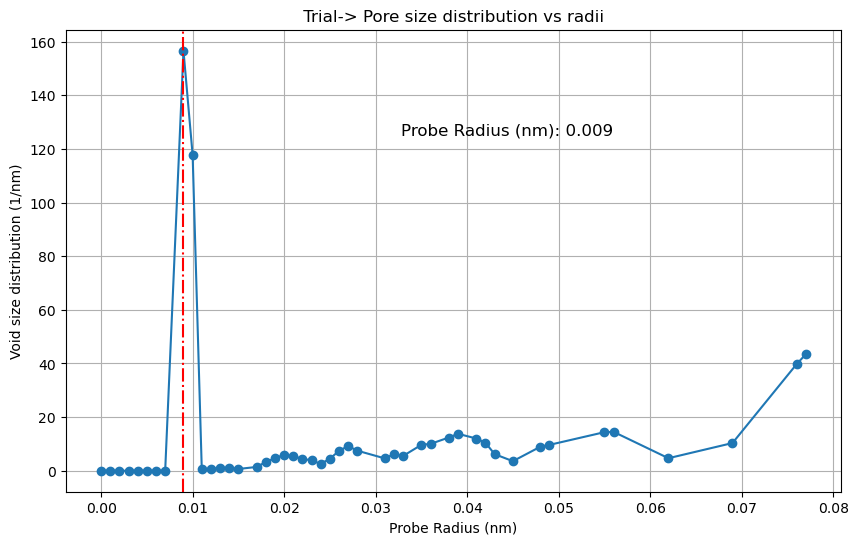

In [ ]:
import time
import pickle 
from functions import *

file_path = os.getcwd() + "/results"
data = []
for i in range(1, 5000):
    dot = {
        "name": f"dot{i}",
        "x": uniform(0, 3),
        "y": uniform(0, 3),
        "z": uniform(0, 3),
        "radius": uniform(0.1, 0.2)  # Random radius between 0.1 and 1.5
    }
    data.append(dot)

########################################################################################################################
start_time = time.time()
unique_radii, counts, cdf_reversed,  derivative, x_fit, y_fit, params, sphere_list = VSD(data,
                                                                            number_grid_points = 5, 
                                                                            box_dimensions_array = [3,3,3],
                                                                            step_size = 0.001, # In nm (radius) was 0.001
                                                                            units = "nm",
                                                                            diameter=False,
                                                                            Gaussian_Fit = False, 
                                                                            GPU = False)
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

PSD_histogram = {k: v for k, v in zip(unique_radii, counts)}
PSD_Cumulative = {k: v for k, v in zip(unique_radii, cdf_reversed)}
PSD_derivative = {k: v for k, v in zip(unique_radii, derivative)}

######## 1 #################################################################
with open(os.path.join(file_path, "PSD_histogram_trial.json"), 'w') as json_file:
    json.dump(PSD_histogram, json_file, indent=4)

print(f'The dictionary has been saved as {os.path.join(file_path, "PSD_histogram.json")}')
################################################################################################

######## 2 #################################################################
with open(os.path.join(file_path, "PSD_Cumulative_trial.json"), 'w') as json_file:
    json.dump(PSD_Cumulative, json_file, indent=4)

print(f'The dictionary has been saved as {os.path.join(file_path, "PSD_Cumulative.json")}')
################################################################################################

######## 3 #################################################################
with open(os.path.join(file_path, "PSD_derivative_trial.json"), 'w') as json_file:
    json.dump(PSD_derivative, json_file, indent=4)

print(f'The dictionary has been saved as {os.path.join(file_path, "PSD_derivative.json")}')
################################################################################################
with open(os.path.join(file_path, 'sphere_list_trial.pyx'), 'wb') as file:
    pickle.dump(sphere_list, file)


plot_VSD(file_path, unique_radii,counts,cdf_reversed, derivative, units = "nm", Diameter = False , save = True, case = "Trial->" )

Now let's plot the void spaces

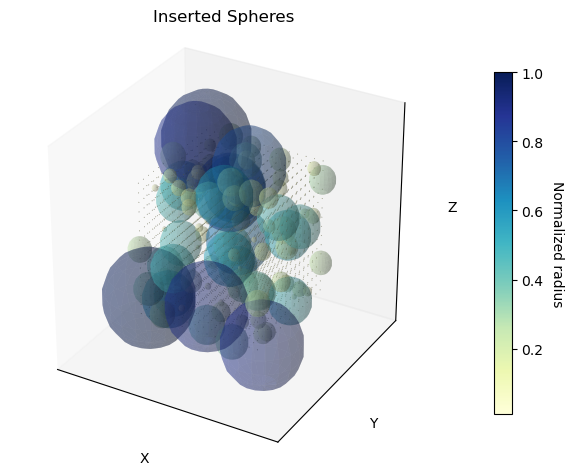

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

file_path = os.getcwd() + '/results/'

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
# Plot ONLY the filtered spheres into this single axes
load_and_plot_single_with_colorbar(file_path,
                                    file_suffix="_trial",
                                    ax=ax,
                                    title="Inserted Spheres",
                                      filter_by_radius=False)

plt.tight_layout()
plt.savefig(os.path.join(file_path, f"Visual_Rendition_VOID_space.png"), bbox_inches='tight', dpi=600)
